In [ ]:
pip install --upgrade google-cloud-storage

     |████████████████████████████████| 106 kB 3.3 MB/s 
     |████████████████████████████████| 109 kB 48.9 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 1.18.1
    Uninstalling google-cloud-storage-1.18.1:
      Successfully uninstalled google-cloud-storage-1.18.1
ERROR: pip's de

In [ ]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install allennlp

     |████████████████████████████████| 738 kB 5.0 MB/s 
     |████████████████████████████████| 1.7 MB 36.0 MB/s 
     |████████████████████████████████| 3.1 MB 67.3 MB/s 
     |████████████████████████████████| 12.1 MB 24.6 MB/s 
     |████████████████████████████████| 190 kB 67.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 124 kB 70.7 MB/s 
     |████████████████████████████████| 259 kB 63.2 MB/s 
     |████████████████████████████████| 298 kB 52.5 MB/s 
     |████████████████████████████████| 61 kB 695 kB/s 
     |████████████████████████████████| 22.3 MB 61.9 MB/s 
     |████████████████████████████████| 167 kB 64.5 MB/s 
     |████████████████████████████████| 131 kB 66.1 MB/s 
     |████████████████████████████████| 59 kB 8.6 MB/s 
     |████████████████

In [ ]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!unzip -q "/content/gdrive/MyDrive/final_cit_map_function.zip" 

In [ ]:
!unzip -q "/content/gdrive/MyDrive/archive (2).zip"

In [ ]:
citation = pd.DataFrame(columns=['Text_Tokens','Cit_func','citseg_id'])

In [ ]:
import os
paths=[]
d = "/content/per_func_map_organised_small"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [ ]:
for i in range(len(paths)):
  path = paths[i]
  print(path)
  f=open(path)
  data=json.load(f)
  for i in data.values():
    citation_contexts=i['citation_contexts']
    for j in range(len(citation_contexts)):
      a=[]
      tokens=citation_contexts[j]['citance']['tokens_pp']
      left = citation_contexts[j]['left_ctx']
      left_tokens=[]
      for l in range(len(left)):
        left_tokens.append(left[l]['tokens_pp'])
      right = citation_contexts[j]['right_ctx']
      right_tokens=[]
      for r in range(len(right)):
        right_tokens.append(right[r]['tokens_pp'])
      
      left_tokens=[item for tokens in left_tokens for item in tokens]
      right_tokens=[item for tokens in right_tokens for item in tokens]
      l=len(left_tokens)
      tokens = left_tokens + tokens + right_tokens
      for cit_refs in range(len(citation_contexts[j]['cit_refs'])):
         citseg_id=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
         if citseg_id not in  a:
            a.append(citseg_id)
            c=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
            c = c + l
            f=citation_contexts[j]['cit_refs'][cit_refs]['function_agreed']
            citation = citation.append({'Text_Tokens':tokens, 'Cit_func':f,'citseg_id':c},ignore_index=True)

/content/per_func_map_organised_small/CoCoGM.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoR0.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSup.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSim.per_func.map_organised_small.json
/content/per_func_map_organised_small/PMot.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoXY.per_func.map_organised_small.json
/content/per_func_map_organised_small/Weak.per_func.map_organised_small.json
/content/per_func_map_organised_small/PModi.per_func.map_organised_small.json
/content/per_func_map_organised_small/Future.per_func.map_organised_small.json
/content/per_func_map_organised_small/Neut.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCo-.per_func.map_organised_small.json
/content/per_func_map_organised_small/PUse.per_func.map_organised_small.json
/content/per_func_map_organised_small/PBas.per_func.map_organised_

In [ ]:
#split the subset by rating to create new train, val and test splits
import collections
by_rating = collections.defaultdict(list)
for _,row in citation.iterrows():
  by_rating[row.Cit_func].append(row.to_dict())

In [ ]:
#create split data
seed =1021
final_list = []
np.random.seed(seed)
train_proportion = 0.8
val_proportion = 0.2
#test_proportion = 0.05

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)

  n_total = len(item_list)
  n_train = int(train_proportion * n_total)
  n_val = int(val_proportion * n_total)
  #n_test = int(test_proportion * n_total)


  #give data points  split attribute

  for item in item_list[:n_train]:
    item['split'] = 'train'

  #for item in item_list[n_train:n_train+n_val]:
   # item['split'] = 'val'

  for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'

  #for item in item_list[n_train+n_val:n_train+n_val+n_test]:
   # item['split'] = 'test'


  #Add to final list

  final_list.extend(item_list)


final_citation = pd.DataFrame(final_list)

In [ ]:
final_citation=final_citation.dropna()

In [ ]:
display(final_citation.Cit_func.value_counts())                   # Inspecting the Number of Ratings.
print(" ")

Neut      1475
PUse       761
CoCoGM     300
PMot       290
PSim       210
Weak       160
CoCoXY     156
PBas       101
PSup       100
CoCoR0     100
Future      85
CoCo-       80
PModi       65
Name: Cit_func, dtype: int64

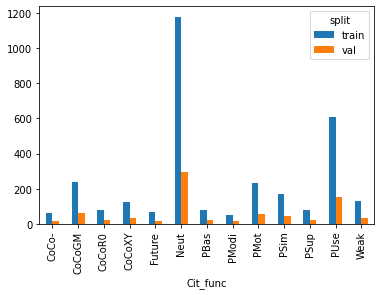

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train      64
          val        16
CoCoGM    train     240
          val        60
CoCoR0    train      80
          val        20
CoCoXY    train     125
          val        31
Future    train      68
          val        17
Neut      train    1180
          val       295
PBas      train      81
          val        20
PModi     train      52
          val        13
PMot      train     232
          val        58
PSim      train     168
          val        42
PSup      train      80
          val        20
PUse      train     609
          val       152
Weak      train     128
          val        32
dtype: int64

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "CoCoGM" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "train"').sample(n=400).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "PMot" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "PUse" & split == "train"').sample(n=200).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "val"').sample(n=100).index,inplace=True)

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train     64
          val       16
CoCoGM    train    240
          val       60
CoCoR0    train     80
          val       20
CoCoXY    train    125
          val       31
Future    train     68
          val       17
Neut      train    780
          val      295
PBas      train     81
          val       20
PModi     train     52
          val       13
PMot      train    232
          val       58
PSim      train    168
          val       42
PSup      train     80
          val       20
PUse      train    409
          val      152
Weak      train    128
          val       32
dtype: int64

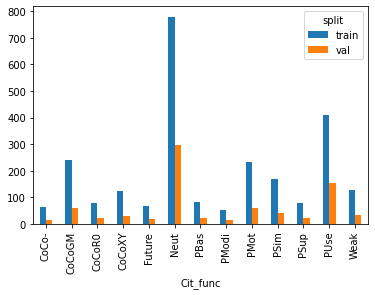

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

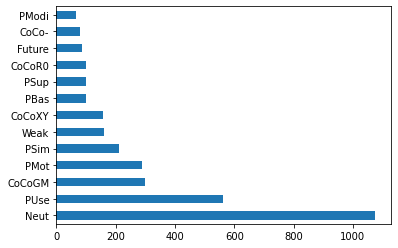

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

In [ ]:
display(final_citation.split.value_counts())

train    2507
val       776
Name: split, dtype: int64

In [ ]:
final_citation['Cit_func'].replace({'PSim':'Comparison or Contrast','Neut':'Background','CoCoXY':'Background','Weak':'Comparison or Contrast',
                                    'CoCoGM':'Comparison or Contrast','PUse':'Uses','PBas':'Extends','PModi':'Extends','CoCoR0':'Comparison or Contrast',
                                    'PMot':'Motivation','CoCo-':'Comparison or Contrast','PSup':'Comparison or Contrast'
                                    }, inplace=True)

In [ ]:
final_citation['Cit_func'].unique()

array(['Comparison or Contrast', 'Background', 'Future', 'Extends',
       'Motivation', 'Uses'], dtype=object)

In [ ]:
display(final_citation.split.value_counts())

train    2507
val       776
Name: split, dtype: int64

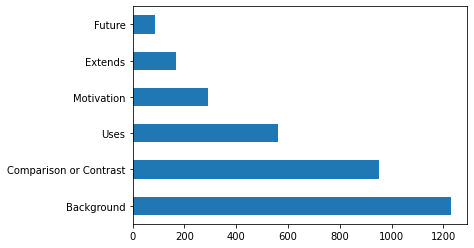

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

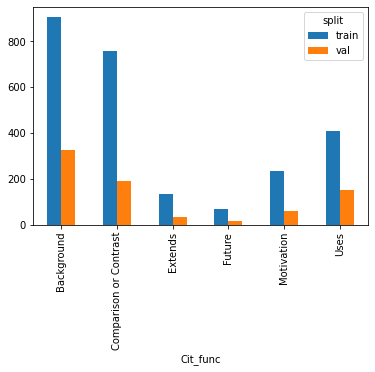

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation = final_citation.sample(frac=1).reset_index(drop=True)

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index#,token
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [ ]:
class CitationVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""    
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab

    def vectorize(self, title, vector_length=-1):
        """
        Args:
            title (str): the string of words separated by a space
            vector_length (int): an argument for forcing the length of index vector
        Returns:
            the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token) 
                       for token in title)
        indices.append(self.title_vocab.end_seq_index)

        if vector_length < 0:
            vector_length = len(indices)

        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.title_vocab.mask_index
        return out_vector

    @classmethod
    def from_dataframe(cls, citation_df, cutoff=0):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            citation_df (pandas.DataFrame): the target dataset
            cutoff (int): frequency threshold for including in Vocabulary 
        Returns:
            an instance of the CitationVectorizer
        """
        category_vocab = Vocabulary()     
        for category in sorted(set(citation_df.Cit_func)):
            category_vocab.add_token(category)
            #a=category_vocab.add_token(category)
            #print(a)
        word_counts = Counter()
        for title in citation_df.Text_Tokens:
          # print("title is %s"%title)
          for token in title:
              # print("token is %s"%token)
              #if token not in string.punctuation:
              word_counts[token] += 1
        
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            # print("word:word_count are %s:%d"%(word,word_count))
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

    @classmethod
    def from_serializable(cls, contents):
        
        title_vocab = \
            SequenceVocabulary.from_serializable(contents['title_vocab'])
        category_vocab =  \
            Vocabulary.from_serializable(contents['category_vocab'])

        return cls(title_vocab=title_vocab, category_vocab=category_vocab)

    def to_serializable(self):
        return {'title_vocab': self.title_vocab.to_serializable(),
                'category_vocab': self.category_vocab.to_serializable()}

In [ ]:
class CitationDataset(Dataset):
    def __init__(self, citation_df, vectorizer):
        """
        Args:
            citation_df (pandas.DataFrame): the dataset
            vectorizer (CitationVectorizer): vectorizer instatiated from dataset
        """
        self.citation_df = citation_df
        self._vectorizer = vectorizer

        # +1 if only using begin_seq, +2 if using both begin and end seq tokens
        measure_len = lambda context: len(context)
        self._max_seq_length = max(map(measure_len, citation_df.Text_Tokens)) + 2
        

        self.train_df = self.citation_df[self.citation_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.citation_df[self.citation_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.citation_df[self.citation_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

        # Class weights
        class_counts = citation_df.Cit_func.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.category_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

        
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, citation_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            citation_csv (str): location of the dataset
        Returns:
            an instance of citationDataset
        """
        citation_df = citation_csv
        train_citation_df = citation_df[citation_df.split=='train']
        return cls(citation_df, CitationVectorizer.from_dataframe(train_citation_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, citation_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            surname_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of SurnameDataset
        """
        
        citation_df = citation_csv
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(citation_csv, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of functionVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return NameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        
        
        row = self._target_df.iloc[index]
        citseg= row.citseg_id

        # title_vector = \
        #     self._vectorizer.vectorize(row.Text_Tokens, self._max_seq_length)

        # category_index = row.Cit_func
        #print(category_index)
        category_index = self._vectorizer.category_vocab.lookup_token(row.Cit_func)
        # print("title_vector")
        title_vector=row.Text_Tokens
        # print(title_vector)
        
        # return {'x_data': title_vector,
        #         'y_target': category_index,
        #         'citseg_id':citseg
        #         }

        return title_vector, category_index , citseg

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

def my_collate(batch):
   print(batch)
   return batch

def batchify(data, bsz, shuffle=False,device="cpu"):
    if shuffle:
        random.shuffle(data)
    sents,tags,citseg = zip(*data)
    nbatch = (len(sents)+bsz-1) // bsz
    # downsample biggest class
    # sents, tags = balance_tags(sents, tags)

    for i in range(nbatch):

        batch = sents[i*bsz:(i+1)*bsz]
        batch1 = batch
        batch_tags = tags[i*bsz:(i+1)*bsz]
        citseg_id  = citseg[i*bsz:(i+1)*bsz]
        batch = batch_to_ids(batch)
        batch_tags = torch.tensor(batch_tags).long()
        citseg_id = torch.tensor(citseg_id).long()
        # lengths = [torch.tensor(l).long() for l in lengths]
        # print("batch")
        # print(batch)
        # print("batch_tags")
        # print(device)
        # print(batch_tags)
        batch=batch.to(device)
        batch_tags=batch_tags.to(device)
        citseg_id = citseg_id.to(device)
        # yield (batch, batch_tags, lengths)
        yield (batch, batch_tags, citseg_id,batch1)

In [ ]:
# bilstm output of citeseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# h1 + hn + citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier3(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier3, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*6, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        s=sentences.shape[1]
        packed_output, (hidden, cell) = self.lstm(x)
        h_1 = packed_output[torch.arange(packed_output.size(0)),0]
        h_n = packed_output[torch.arange(packed_output.size(0)),s-1]
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        h_1h_n=torch.cat([h_1,packed_output,h_n],dim=1)
        out = self.fc1(h_1h_n)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# attention
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        # print("weighted_input.shape")
        # print(weighted_input.shape)
        return (weighted_input)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1


In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
def load_glove_from_file(glove_filepath):
    """
    Load the GloVe embeddings 
    
    Args:
        glove_filepath (str): path to the glove embeddings file 
    Returns:
        word_to_index (dict), embeddings (numpy.ndarary)
    """

    word_to_index = {}
    embeddings = []
    with open(glove_filepath, "r") as fp:
        for index, line in enumerate(fp):
            line = line.split(" ") # each line: word num1 num2 ...
            word_to_index[line[0]] = index # word = line[0] 
            embedding_i = np.array([float(val) for val in line[1:]])
            embeddings.append(embedding_i)
    return word_to_index, np.stack(embeddings)

def make_embedding_matrix(glove_filepath, words):
    """
    Create embedding matrix for a specific set of words.
    
    Args:
        glove_filepath (str): file path to the glove embeddigns
        words (list): list of words in the dataset
    """
    word_to_idx, glove_embeddings = load_glove_from_file(glove_filepath)
    embedding_size = glove_embeddings.shape[1]
    final_embeddings = np.zeros((len(words), embedding_size))

    for i, word in enumerate(words):
        if word in word_to_idx:
            final_embeddings[i, :] = glove_embeddings[word_to_idx[word]]
        else:
            embedding_i = torch.ones(1, embedding_size)
            torch.nn.init.xavier_uniform_(embedding_i)
            final_embeddings[i, :] = embedding_i
    print(final_embeddings)
    print(final_embeddings.shape)
    return final_embeddings

In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    # Data and Path hyper parameters
    citation_csv=final_citation,
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch5/document_classification",
    # Model hyper parameters
    glove_filepath='/content/glove.6B.300d.txt', 
    use_glove=False,
    embedding_size=300, 
    hidden_dim=32,
    # Training hyper parameter
    seed=1337, 
    learning_rate=0.001, 
    dropout_p=0.1, 
    batch_size=30, 
    num_epochs=20, 
    num_layers=2,
    early_stopping_criteria=5, 
    # Runtime option
    cuda=True, 
    catch_keyboard_interrupt=True, 
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
) 

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch5/document_classification/vectorizer.json
	model_storage/ch5/document_classification/model.pth
Using CUDA: True


In [ ]:
args.use_glove = True

In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = CitationDataset.load_dataset_and_load_vectorizer(args.citation_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = CitationDataset.load_dataset_and_make_vectorizer(args.citation_csv)
    dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
print(len(vectorizer.title_vocab))
# Use GloVe or randomly initialized embeddings
if args.use_glove:
    words = vectorizer.title_vocab._token_to_idx.keys()
    embeddings = make_embedding_matrix(glove_filepath=args.glove_filepath, 
                                       words=words)
    print("Using pre-trained embeddings")
else:
    print("Not using pre-trained embeddings")
    embeddings = None

classifier = CitationClassifier1(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

16728
[[-0.11907164 -0.00123771  0.03475953 ...  0.10838436 -0.02188396
  -0.09059642]
 [-0.03658002  0.06027976 -0.01801901 ...  0.11394491 -0.03662597
  -0.09734906]
 [-0.07221913 -0.02466366 -0.03699218 ...  0.0299247  -0.07259606
  -0.04028996]
 ...
 [ 0.024889   -0.15851    -0.19032    ... -0.17296    -0.33603
  -0.25569   ]
 [ 0.37002    -0.45283     0.70053    ...  0.69341     0.24019
   0.065249  ]
 [ 0.10476776 -0.07515869  0.02444218 ...  0.06867117 -0.13481018
  -0.01800561]]
(16728, 300)
Using pre-trained embeddings


downloading: 100%|##########| 336/336 [00:00<00:00, 1.07MiB/s]
downloading: 100%|##########| 357M/357M [00:16<00:00, 22.9MiB/s]


CitationClassifier1(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
embeddings.shape

(16728, 300)

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7101590083195612	 val_acc=26.1439842209073
Epoch 1	 val_loss=1.6574645042419434	 val_acc=25.650887573964496
Epoch 2	 val_loss=1.632040514395787	 val_acc=27.91913214990138
Epoch 3	 val_loss=1.6401293919636655	 val_acc=26.213017751479292
Epoch 4	 val_loss=1.6056073491389935	 val_acc=35.88757396449704
Epoch 5	 val_loss=1.5934086579542894	 val_acc=32.86982248520711
Epoch 6	 val_loss=1.5809554045016945	 val_acc=38.23471400394478
Epoch 7	 val_loss=1.5645172871076143	 val_acc=41.696252465483234
Epoch 8	 val_loss=1.6140728134375353	 val_acc=32.81065088757397
Epoch 9	 val_loss=1.553067331130688	 val_acc=42.850098619329394
Epoch 10	 val_loss=1.5372824806433458	 val_acc=45.02958579881657
Epoch 11	 val_loss=1.518640536528367	 val_acc=43.836291913214986
Epoch 12	 val_loss=1.5339737763771646	 val_acc=46.33136094674557
Epoch 13	 val_loss=1.560791437442486	 val_acc=41.5483234714004
Epoch 14	 val_loss=1.4917304194890535	 val_acc=49.684418145956606
Epoch 15	 val_loss=1.48761846927496

In [ ]:
print("val loss: {};".format(train_state['val_loss']))
print("val Accuracy: {}".format(train_state['val_acc']))

val loss: [1.7101590083195612, 1.6574645042419434, 1.632040514395787, 1.6401293919636655, 1.6056073491389935, 1.5934086579542894, 1.5809554045016945, 1.5645172871076143, 1.6140728134375353, 1.553067331130688, 1.5372824806433458, 1.518640536528367, 1.5339737763771646, 1.560791437442486, 1.4917304194890535, 1.487618469274961, 1.48040372133255, 1.469194127963139, 1.4809985023278456, 1.4802833382899947];
val Accuracy: [26.1439842209073, 25.650887573964496, 27.91913214990138, 26.213017751479292, 35.88757396449704, 32.86982248520711, 38.23471400394478, 41.696252465483234, 32.81065088757397, 42.850098619329394, 45.02958579881657, 43.836291913214986, 46.33136094674557, 41.5483234714004, 49.684418145956606, 51.518737672583825, 51.75542406311637, 49.70414201183432, 52.820512820512825, 50.23668639053255]


In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 5, 4, 2, 1, 0, 5, 2, 1, 1, 3, 1, 2, 3, 0, 5, 0, 4, 4, 4, 0, 3, 5,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
true_y.shape

(25, 30)

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.71      0.37      0.49       312
Comparison or Contrast       0.58      0.51      0.54       184
               Extends       0.17      0.34      0.23        32
                Future       0.30      0.81      0.43        16
            Motivation       0.28      0.57      0.37        56
                  Uses       0.56      0.75      0.65       150

              accuracy                           0.50       750
             macro avg       0.43      0.56      0.45       750
          weighted avg       0.58      0.50      0.51       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

In [ ]:
cf_matrix

array([[116,  48,  28,  15,  52,  53],
       [ 26,  93,   9,   6,  26,  24],
       [  3,   8,  11,   1,   3,   6],
       [  1,   0,   0,  13,   2,   0],
       [  9,   5,   3,   3,  32,   4],
       [  9,   7,  14,   6,   1, 113]])

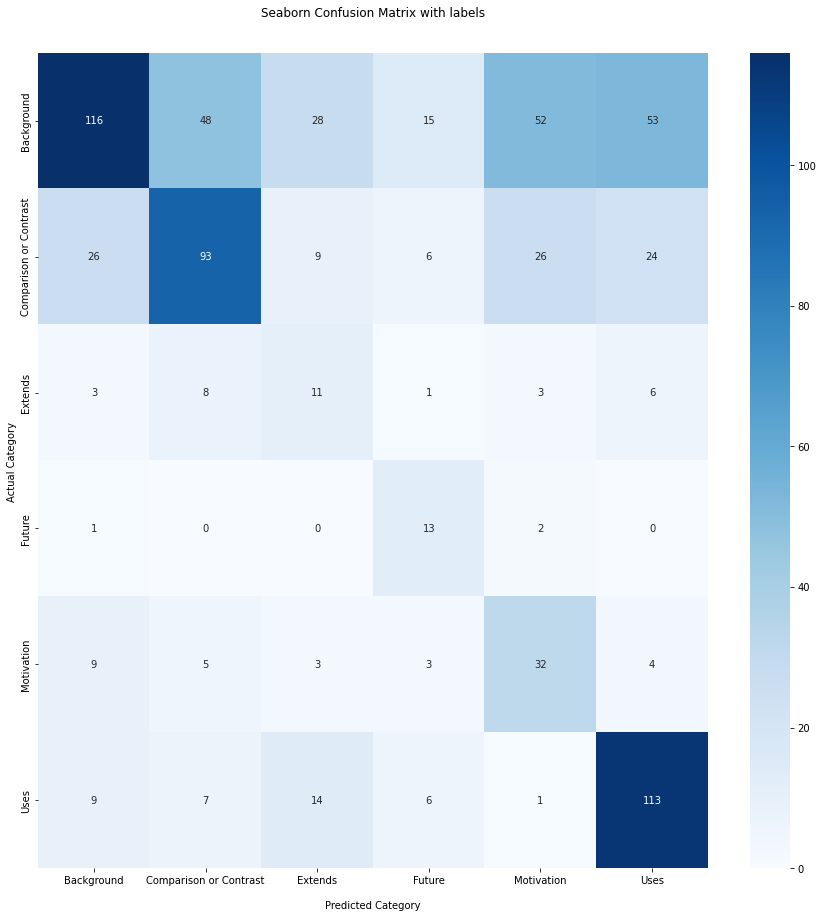

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier3(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

CitationClassifier3(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7040097071574285	 val_acc=32.0414201183432
Epoch 1	 val_loss=1.7086031895417433	 val_acc=16.104536489151876
Epoch 2	 val_loss=1.6155250026629524	 val_acc=38.658777120315584
Epoch 3	 val_loss=1.6013162365326514	 val_acc=36.99211045364893
Epoch 4	 val_loss=1.6076056086100068	 val_acc=42.7810650887574
Epoch 5	 val_loss=1.6176516505388117	 val_acc=37.8895463510848
Epoch 6	 val_loss=1.5910389790168173	 val_acc=44.72386587771203
Epoch 7	 val_loss=1.573326367598314	 val_acc=45.108481262327416
Epoch 8	 val_loss=1.5615248313316932	 val_acc=46.242603550295854
Epoch 9	 val_loss=1.5696505674949064	 val_acc=45.62130177514793
Epoch 10	 val_loss=1.538526695508223	 val_acc=49.319526627218934
Epoch 11	 val_loss=1.5354863817875204	 val_acc=47.761341222879686
Epoch 12	 val_loss=1.5472676020402178	 val_acc=49.812623274161744
Epoch 13	 val_loss=1.5280023033802321	 val_acc=50.68047337278107
Epoch 14	 val_loss=1.5298414138647227	 val_acc=50.838264299802766
Epoch 15	 val_loss=1.54403856167

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]
sent=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])
    sent.append(batch_dict[3])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
sent.pop()

(['However',
  ',',
  'for',
  'the',
  'purposes',
  'of',
  'this',
  'implementation',
  ',',
  'we',
  'have',
  'taken',
  'the',
  'most',
  'constrained',
  'position',
  '.',
  'Note',
  'that',
  ',',
  'since',
  'we',
  'do',
  'not',
  'deal',
  'with',
  'such',
  'Full',
  'Attachment',
  'model',
  'has',
  'been',
  'argued',
  'for',
  ',',
  'especially',
  'with',
  'regard',
  'to',
  'the',
  'processing',
  'of',
  'headfinal',
  'languages',
  ',',
  'where',
  'evidence',
  'has',
  'been',
  'found',
  'of',
  'pre-head',
  'structuring',
  '(',
  'CITSEG',
  ')',
  '.',
  'Such',
  'models',
  'have',
  'also',
  'been',
  'explored',
  'computationally',
  '(',
  'CITSEG',
  ')',
  '.'],
 ['In',
  'the',
  'field',
  'of',
  'statistical',
  'parsing',
  ',',
  'various',
  'probabilistic',
  'evaluation',
  'models',
  'have',
  'been',
  'proposed',
  'where',
  'different',
  'models',
  'use',
  'different',
  'feature',
  'types',
  '[',
  'CITSEG',
  ']

In [ ]:
flat_list = [item for sent in sent for item in sent]

In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 1, 5, 1, 2, 1, 0, 4, 1, 1, 1, 1, 0, 0, 1, 0, 5, 4, 0, 4, 4, 0, 0, 2,
        5, 0], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
missclass = pd.DataFrame()

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
missclass['prediction']=pred_y

In [ ]:
missclass['sent']=flat_list

In [ ]:
missclass['true']=true_y

In [ ]:
missclass

,prediction,sent,true
0,1,"[All, experiments, used, gold, tokenization, /, segmentation, ., Unlike, the, ATB, ,, the, FTB, does, not, contain, the, raw, source, documents, ,, so, we, could, not, start, from, raw, text, for, both, languages, ., We, previously, showed, that, segmentation, errors, decrease, Arabic, parsing, accuracy, by, about, 2.0, %, F1, (, CITSEG, ), ., Morphological, analysis, accuracy, was, another, e...",0
1,4,"[Following, G&G, ,, we, require, that, the, prosody, rules, build, a, binary, tree, whose, terminals, are, phonological, words, and, whose, node, labels, are, indices, that, mark, boundary, salience, ., An, alternative, representation, based, on, CITSEG, is, presented, in, CITSEG, ,, which, contends, that, prosody, ,, including, prosodic, phrasing, ,, is, more, properly, represented, as, a, gr...",0
2,5,"[For, a, cogent, introduction, to, genetic, search, and, an, explanation, of, why, it, works, ,, the, reader, is, referred, to, (, CITSEG, ), ., Before, presenting, the, version, of, the, algorithm, used, in, the, implementation, ,, !, ., ~hall, informally, define, the, key, data, types, it, uses, ah, ,, ng, with, tim, standard, operations, on, those, types, ., g, ,, ,, ne, A, line, ;, at, enc...",0
3,5,"[In, order, to, train, the, POS, -, based, reordering, model, ,, probabilistic, rules, were, learned, based, on, the, POS, tags, from, the, TreeTagger, (, CITSEG, ), of, the, training, corpus, and, the, alignment, ., As, described, in, CITSEG, ,, continuous, reordering, rules, are, extracted, ., This, modeling, of, short, -, range, reorderings, was, extended, so, that, it, can, cover, also, lo...",5
4,5,"[For, instance, ,, purpose-oriented, extracts, less, than, 10, sentences, long, are, generated, containing, a, predetermined, number, of, AIM, ,, SOLU, -, TION, and, BACKGROUND, zones, ., As, the, emphasis, of, this, approach, was, the, identification, of, the, argumentative, zones, ,, less, attention, was, given, to, the, sentence, selection, criteria, for, the, extractive, summaries, ., The,...",0
5,4,"[While, self-, training, has, worked, in, several, domains, ,, the, early, results, on, self, -, training, for, parsing, were, negative, (, CITSEG, ), ., However, more, recent, results, have, shown, that, it, can, indeed, improve, parser, performance, (, CITSEG, ), ., One, possible, use, for, this, technique, is, for, parser, adaptation, -, initially, training, the, parser, on, one, type, of, ...",4
6,5,"[That, is, ,, the, text, between, the, relevant, segment, boundaries, is, not, reordered, nor, mixed, with, the, text, outside, these, boundaries, ., 3, Thus, the, text, in, the, target, language, segment, comes, only, from, the, corresponding, source, language, segment, ., We, use, the, Moses, statistical, MT, (, SMT, ), toolkit, (, CITSEG, ), to, perform, the, translation, ., In, Moses, ,, t...",5
7,1,"[The, second, stage, of, our, dependency, parser, is, a, reranker, that, operates, on, the, output, of, the, k, -best, MST, parser, ., Features, in, this, model, are, not, constrained, as, in, the, edge, -, factored, model, ., Many, of, the, model, features, have, been, inspired, by, the, constituency, -, based, features, presented, in, CITSEG, ., We, have, also, included, features, that, expl...",4
8,5,"[During, the, categorization, phase, ,, the, representation, is, used, to, assign, the, appropriate, class, to, a, new, document, vector, ., Several, pruning, or, specialization, heuristics, can, be, used, to, control, the, amount, of, generalization, ., We, used, ID3, (, CITSEG, ), ,, C4.5, (, CITSEG, ), and, C5.0, ,, RIPPER, (, CITSEG, ), ,, and, the, Naive, Bayes, inducer, (, CITSEG, ), con...",5
9,4,"[Keyword, -, based, search, engines, have, been, one, of, the, most, highly, utilized, internet, tools, in, recent, years, ., Nevertheless, ,, search, performance, remains, unsatisfactory, at, most, e-commerce, sites, (, CITSEG, ), ., Librarians, and, search, professionals, have, traditionally, favor

In [ ]:
missclass["true"].replace({0: "Background", 1: "Comparison or Contrast",2:"Extends",3:"Future",4:"Motivation",5:"Uses"}, inplace=True)

In [ ]:
missclass['prediction'].replace({0: "Background", 1: "Comparison or Contrast",2:"Extends",3:"Future",4:"Motivation",5:"Uses"}, inplace=True)

In [ ]:
missclass.replace(',','', regex=True, inplace=True)

In [ ]:
missclass.to_csv('6functionselmocontext.csv')

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.73      0.55      0.63       312
Comparison or Contrast       0.61      0.48      0.54       184
               Extends       0.19      0.38      0.25        32
                Future       0.24      0.25      0.24        16
            Motivation       0.29      0.54      0.38        56
                  Uses       0.61      0.76      0.67       150

              accuracy                           0.56       750
             macro avg       0.44      0.49      0.45       750
          weighted avg       0.61      0.56      0.57       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

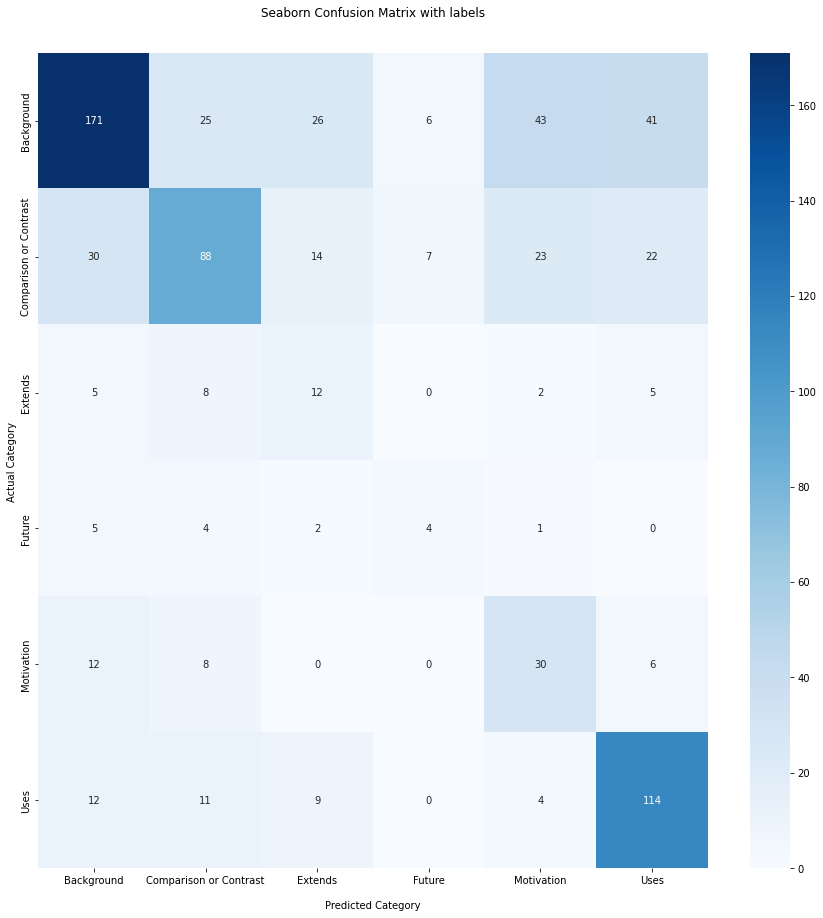

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7923115079219525	 val_acc=24.477317554240635
Epoch 1	 val_loss=1.7922893441640413	 val_acc=24.477317554240635
Epoch 2	 val_loss=1.7917871521069455	 val_acc=24.477317554240635
Epoch 3	 val_loss=1.7908598551383386	 val_acc=24.477317554240635
Epoch 4	 val_loss=1.789523381453294	 val_acc=24.477317554240635
Epoch 5	 val_loss=1.787529014624082	 val_acc=27.29783037475345
Epoch 6	 val_loss=1.7792841104360724	 val_acc=29.861932938856015
Epoch 7	 val_loss=1.765588178084447	 val_acc=31.91321499013806
Epoch 8	 val_loss=1.7569410709234385	 val_acc=33.57988165680474
Epoch 9	 val_loss=1.7480515149923472	 val_acc=33.41222879684419
Epoch 10	 val_loss=1.7349785337081323	 val_acc=30.335305719921113
Epoch 11	 val_loss=1.7275722210223858	 val_acc=27.16962524654832
Epoch 12	 val_loss=1.7155862542299123	 val_acc=26.360946745562128
Epoch 13	 val_loss=1.7175302413793707	 val_acc=24.41814595660749
Epoch 14	 val_loss=1.7203625532296987	 val_acc=24.714003944773168
Epoch 15	 val_loss=1.71322163

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([1, 1, 5, 1, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 1, 5, 1, 5,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.00      0.00      0.00       312
Comparison or Contrast       0.37      0.26      0.30       184
               Extends       0.00      0.00      0.00        32
                Future       0.03      0.75      0.07        16
            Motivation       0.00      0.00      0.00        56
                  Uses       0.46      0.84      0.60       150

              accuracy                           0.25       750
             macro avg       0.14      0.31      0.16       750
          weighted avg       0.18      0.25      0.19       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

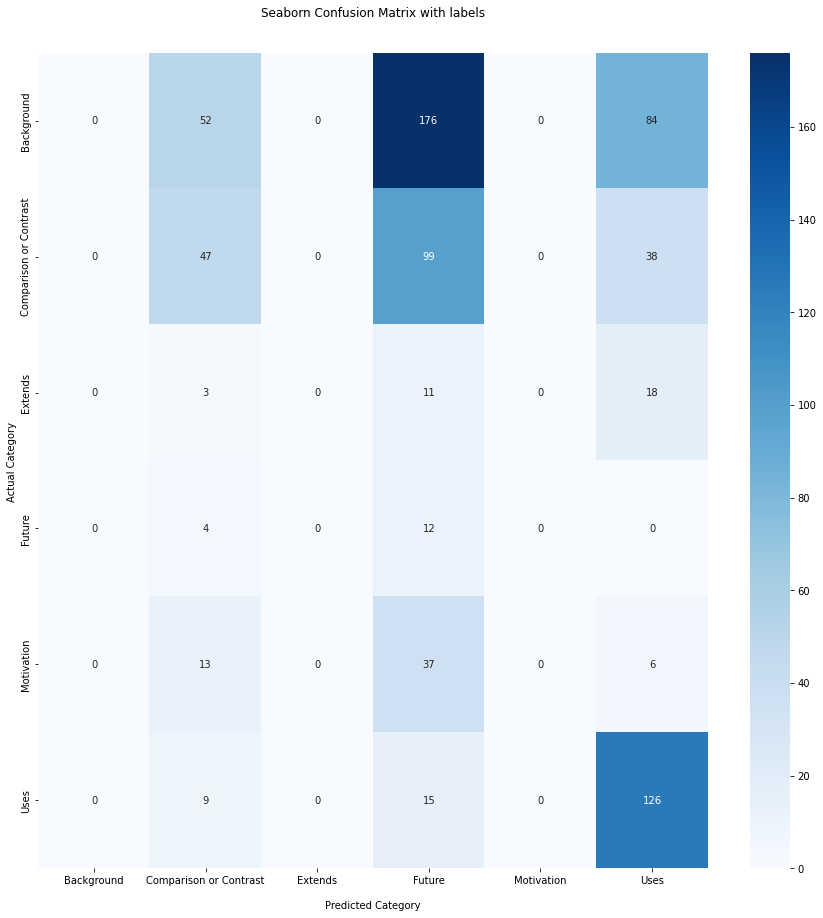

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could generate a global attentive sentence vector and use that for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7796695645038896	 val_acc=18.136094674556215
Epoch 1	 val_loss=1.73707017990259	 val_acc=25.355029585798817
Epoch 2	 val_loss=1.6756898806645317	 val_acc=37.05128205128206
Epoch 3	 val_loss=1.6547061846806455	 val_acc=44.2603550295858
Epoch 4	 val_loss=1.6634651880997877	 val_acc=37.603550295857985
Epoch 5	 val_loss=1.6460723693554218	 val_acc=36.74556213017752
Epoch 6	 val_loss=1.6300639876952538	 val_acc=44.891518737672584
Epoch 7	 val_loss=1.624892913378202	 val_acc=44.25049309664694
Epoch 8	 val_loss=1.6548960529840908	 val_acc=36.35108481262327
Epoch 9	 val_loss=1.638128143090468	 val_acc=36.18343195266272
Epoch 10	 val_loss=1.6060823568930993	 val_acc=44.95069033530573
Epoch 11	 val_loss=1.6203562204654396	 val_acc=41.60749506903352
Epoch 12	 val_loss=1.6203834460331845	 val_acc=38.629191321499015
Epoch 13	 val_loss=1.6085071517870972	 val_acc=44.65483234714003
Epoch 14	 val_loss=1.6048901172784658	 val_acc=45.57199211045365
Epoch 15	 val_loss=1.59464777891452

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([1, 2, 5, 0, 2, 5, 1, 5, 0, 1, 1, 1, 0, 0, 3, 0, 5, 2, 0, 0, 1, 0, 0, 4,
        5, 0], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.72      0.44      0.55       312
Comparison or Contrast       0.44      0.44      0.44       184
               Extends       0.12      0.44      0.19        32
                Future       0.34      0.62      0.44        16
            Motivation       0.09      0.05      0.07        56
                  Uses       0.50      0.66      0.57       150

              accuracy                           0.46       750
             macro avg       0.37      0.44      0.38       750
          weighted avg       0.53      0.46      0.47       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

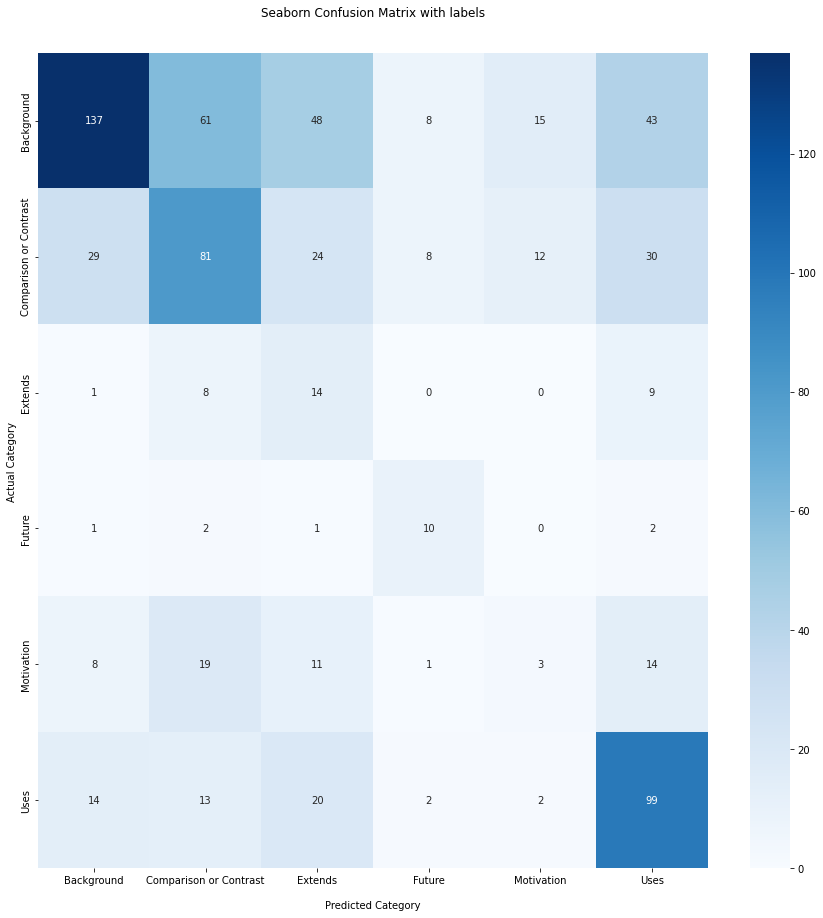

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#whether you can replace the sentence vector with max pooling of the sentence (as the sentence vector)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        packed_output=torch.max(packed_output, 1)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7656011535571172	 val_acc=15.80867850098619
Epoch 1	 val_loss=1.7308490092937765	 val_acc=18.26429980276134
Epoch 2	 val_loss=1.7307908626703117	 val_acc=21.459566074950686
Epoch 3	 val_loss=1.652729726754702	 val_acc=43.777120315581854
Epoch 4	 val_loss=1.6447756244586067	 val_acc=37.14003944773176
Epoch 5	 val_loss=1.6416612542592561	 val_acc=40.621301775147934
Epoch 6	 val_loss=1.6478588856183565	 val_acc=39.29980276134122
Epoch 7	 val_loss=1.6480642006947441	 val_acc=33.106508875739635
Epoch 8	 val_loss=1.6536490046061003	 val_acc=33.63905325443787
Epoch 9	 val_loss=1.6494574088316698	 val_acc=39.81262327416174
Epoch 10	 val_loss=1.632195559831766	 val_acc=41.44970414201184
Epoch 11	 val_loss=1.648012853585757	 val_acc=38.826429980276124
Epoch 12	 val_loss=1.6361273389596205	 val_acc=41.62721893491124
Epoch 13	 val_loss=1.642610756250528	 val_acc=41.66666666666667
Epoch 14	 val_loss=1.6355758401063771	 val_acc=40.51282051282052
Epoch 15	 val_loss=1.6405723140789

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([1, 1, 5, 2, 0, 5, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 2,
        5, 0], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.59      0.41      0.48       312
Comparison or Contrast       0.37      0.35      0.36       184
               Extends       0.06      0.28      0.10        32
                Future       0.24      0.50      0.32        16
            Motivation       0.00      0.00      0.00        56
                  Uses       0.49      0.59      0.54       150

              accuracy                           0.40       750
             macro avg       0.29      0.35      0.30       750
          weighted avg       0.44      0.40      0.41       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

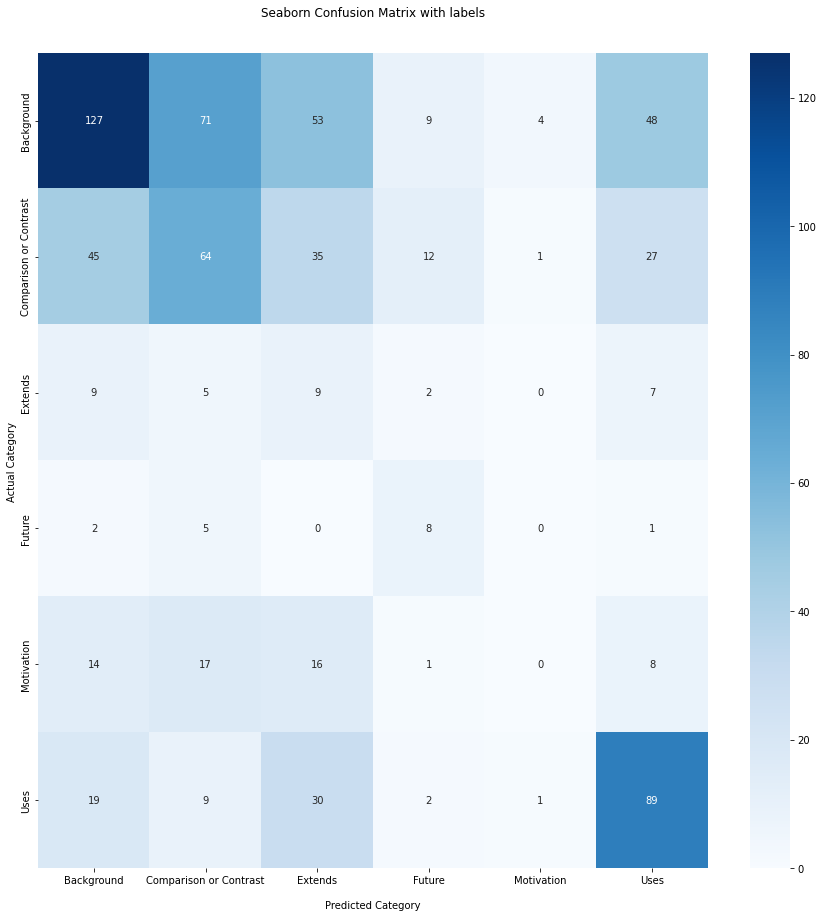

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could append a global attentive sentence vector to citeseg and send the new feature vector for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output1 = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output2=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        att_citeseg=torch.cat([packed_output1,packed_output2],dim=1)
        out = self.fc1(att_citeseg)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7154275545707114	 val_acc=45.700197238658774
Epoch 1	 val_loss=1.6937492168866672	 val_acc=26.93293885601578
Epoch 2	 val_loss=1.6662969039036677	 val_acc=36.86390532544379
Epoch 3	 val_loss=1.668403533788828	 val_acc=33.530571992110445
Epoch 4	 val_loss=1.5932454420970037	 val_acc=43.60946745562131
Epoch 5	 val_loss=1.5929492299373333	 val_acc=40.769230769230774
Epoch 6	 val_loss=1.5778541473241956	 val_acc=41.15384615384615
Epoch 7	 val_loss=1.5661213031181922	 val_acc=44.487179487179496
Epoch 8	 val_loss=1.5514065210635843	 val_acc=45.729783037475336
Epoch 9	 val_loss=1.515338393358084	 val_acc=52.366863905325445
Epoch 10	 val_loss=1.5495943014438334	 val_acc=42.978303747534504
Epoch 11	 val_loss=1.5620124431756828	 val_acc=48.65877712031557
Epoch 12	 val_loss=1.5171842345824609	 val_acc=52.15976331360946
Epoch 13	 val_loss=1.5059353204873893	 val_acc=53.22485207100591
Epoch 14	 val_loss=1.5110781834675717	 val_acc=53.905325443786985
Epoch 15	 val_loss=1.49009009

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 5, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 3, 4, 5, 0, 0, 0, 0, 0, 0, 2,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.67      0.54      0.60       312
Comparison or Contrast       0.56      0.50      0.53       184
               Extends       0.15      0.28      0.20        32
                Future       0.44      0.69      0.54        16
            Motivation       0.30      0.48      0.37        56
                  Uses       0.63      0.69      0.66       150

              accuracy                           0.55       750
             macro avg       0.46      0.53      0.48       750
          weighted avg       0.58      0.55      0.56       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

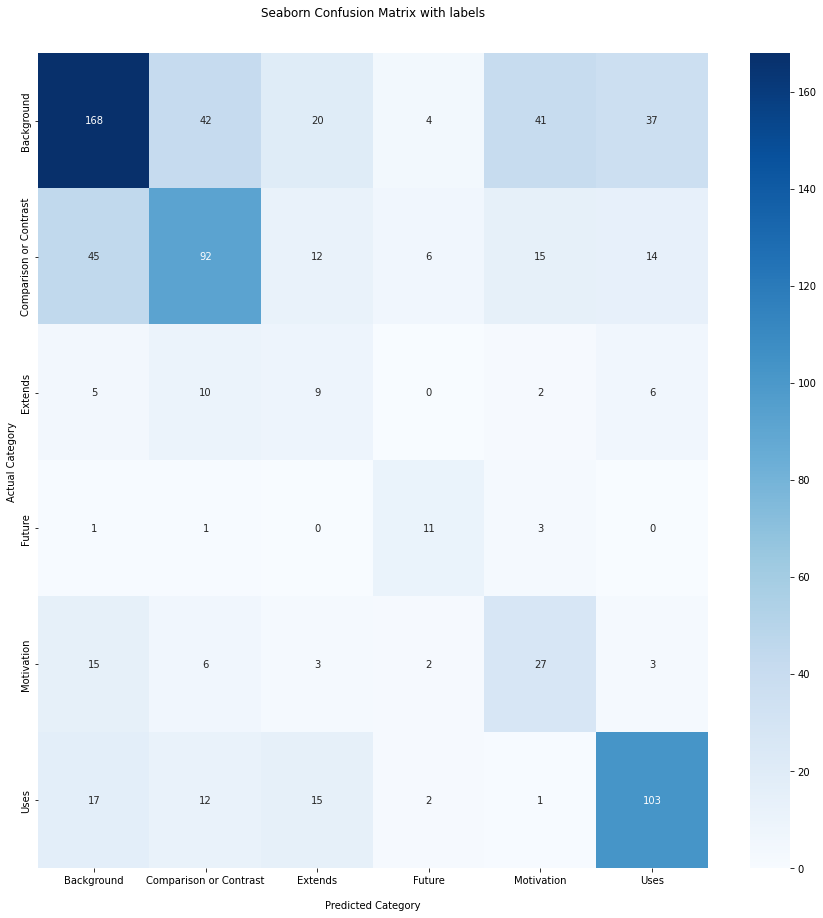

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import torch
torch.cuda.empty_cache()